<a href="https://colab.research.google.com/github/Pumafi/flumy-wgan-mines/blob/main/multiscalegan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-Scale GAN model with Gaussian Noise in Discriminator
(original Multi-Scale paper: https://arxiv.org/abs/1903.06048)

In [ ]:
# From the git
import sys
sys.path.append('..')

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras

from data.load_data import load_data, DataGenerator
from models.ms_gan.multiscale_discriminator import get_discriminator_model
from models.ms_gan.multiscale_gan import MSGAN
from models.ms_gan.multiscale_generator import MultiScaleGenerator
from utils.callbacks import MSGANMonitor
from utils.utils import generate_noise
from utils.visualisation import get_color_map, visualise_slice, multi_scale_paint_image, \
    show_multi_scale_images_and_probas

# Version With Gausian Noise

## Data  
Load the data and create a Data Generator

In [6]:
# Data sizes specifications
slice_size = (64, 128, 4)
batch_size = 20
noise_shape = (8, 16)

In [7]:
# Loading the data
x_train = load_data(slice_size[0], slice_size[1], "./data/horizontal/dataFlumyHoriz.csv")
dataloader = DataGenerator(x_train, batch_size, slice_size)

# Colors map for data visualisation
cmap, norm = get_color_map(number_of_categories=4)

In [ ]:
# Creating the Generator Model
g_model = MultiScaleGenerator(output_dims=slice_size)
g_model.build([None, *noise_shape, 1])
generator_optimizer = keras.optimizers.Adam(learning_rate=5e-4, beta_1=0.5, beta_2=0.99)
g_model.summary()

Model: "multi_scale_generator_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
generator_initial_1 (Generat multiple                  40        
_________________________________________________________________
generator_block_3 (Generator multiple                  39556     
_________________________________________________________________
generator_block_4 (Generator multiple                  27844     
_________________________________________________________________
generator_block_5 (Generator multiple                  7012      
_________________________________________________________________
last_generator_block_1 (Last multiple                  728       
Total params: 75,180
Trainable params: 75,180
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Creating the Discriminator Model
multiscale = (64, 128, 4)

d_model = get_discriminator_model(multiscale)
discriminator_optimizer = keras.optimizers.Adam(learning_rate=5e-4, beta_1=0.5, beta_2=0.99)
d_model.summary()

Model: "discriminator"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 64, 128, 4)] 0                                            
__________________________________________________________________________________________________
initial_discriminator_block_1 ( (None, 32, 64, 16)   5376        input_5[0][0]                    
__________________________________________________________________________________________________
input_6 (InputLayer)            [(None, 32, 64, 4)]  0                                            
__________________________________________________________________________________________________
discriminator_block_3 (Discrimi (None, 16, 32, 32)   15328       initial_discriminator_block_1[0][
                                                                 input_6[0][0]        

In [8]:
# Callback
callback_monitor = MSGANMonitor(noise_shape, cmap, norm, slice_size[0], slice_size[1])

In [ ]:
# Creating the model
msgan = MSGAN(
    discriminator=d_model,
    generator=g_model,
    latent_shape=(*noise_shape, 1),
    discriminator_extra_steps=2,
    generator_extra_steps=2
)

In [ ]:
# Training the model
epochs = 100

msgan.compile(d_optimizer=discriminator_optimizer, g_optimizer=generator_optimizer)

history = msgan.fit(dataloader, batch_size=batch_size, epochs=epochs, callbacks=[])

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


150/150 [==============================] - 61s 404ms/step - d_loss: 1.1276 - g_loss: 1.4548
Epoch 2/100
150/150 [==============================] - 60s 403ms/step - d_loss: 0.9727 - g_loss: 1.4319
Epoch 3/100
150/150 [==============================] - 61s 404ms/step - d_loss: 0.8966 - g_loss: 1.5885
Epoch 4/100
150/150 [==============================] - 61s 405ms/step - d_loss: 0.8563 - g_loss: 1.6659
Epoch 5/100
150/150 [==============================] - 61s 407ms/step - d_loss: 0.8071 - g_loss: 1.7783
Epoch 6/100
150/150 [==============================] - 61s 407ms/step - d_loss: 0.6332 - g_loss: 2.3977
Epoch 7/100
150/150 [==============================] - 61s 408ms/step - d_loss: 0.5754 - g_loss: 2.6738
Epoch 8/100
150/150 [==============================] - 61s 407ms/step - d_loss: 0.4754 - g_loss: 3.1423
Epoch 9/100
150/150 [==============================] - 61s 407ms/step - d_loss: 0.4841 - g_loss: 3.4128
Epoch 10/100
150/150 [==============================] - 61s 410ms/step - d_l

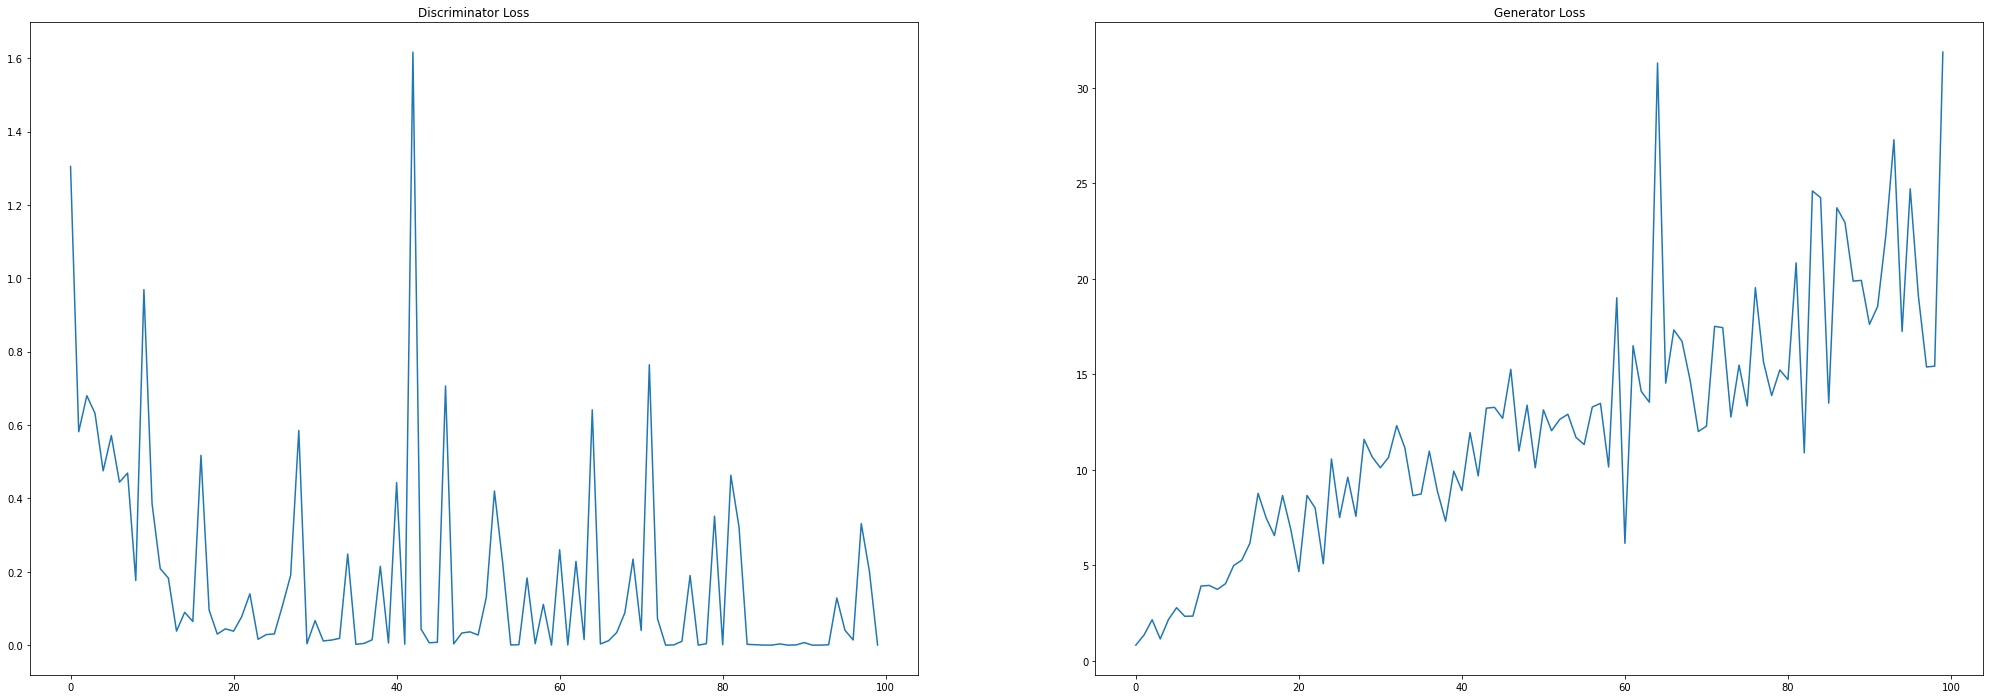

In [ ]:
# Error plotting
x_axis = np.arange(epochs)
plt.figure(figsize=(35, 12))
plt.subplot(1, 2, 1)
plt.title("Discriminator Loss")
plt.plot(x_axis, history.history["d_loss"])
plt.subplot(1, 2, 2)
plt.title("Generator Loss")
plt.plot(x_axis, history.history["g_loss"])
plt.show()

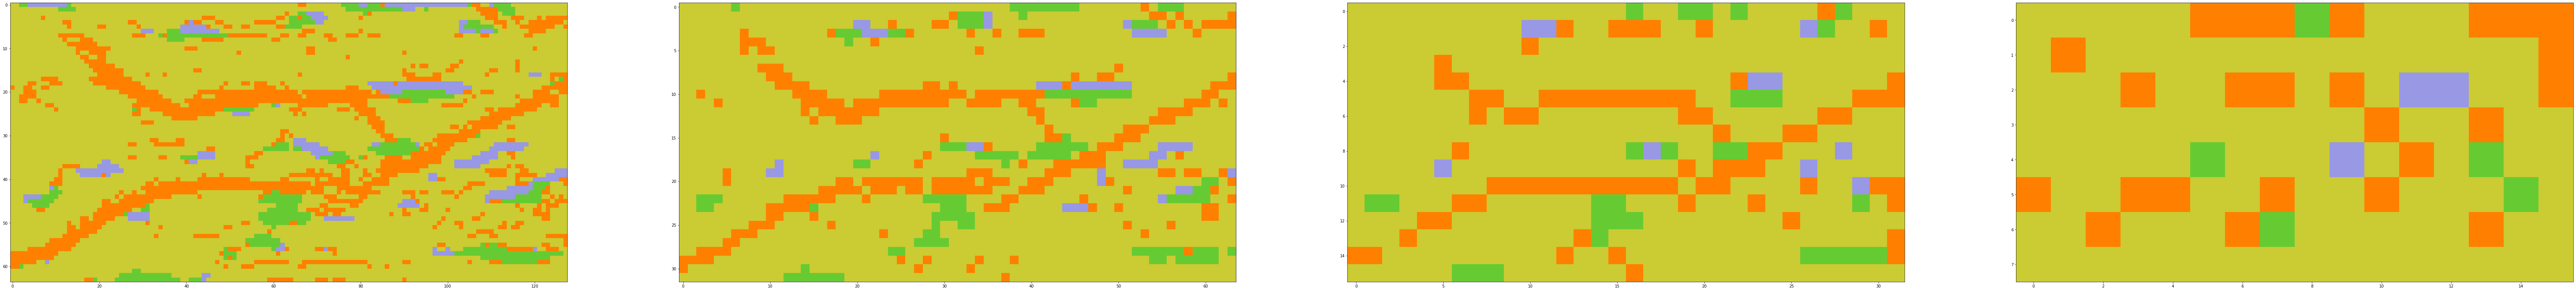

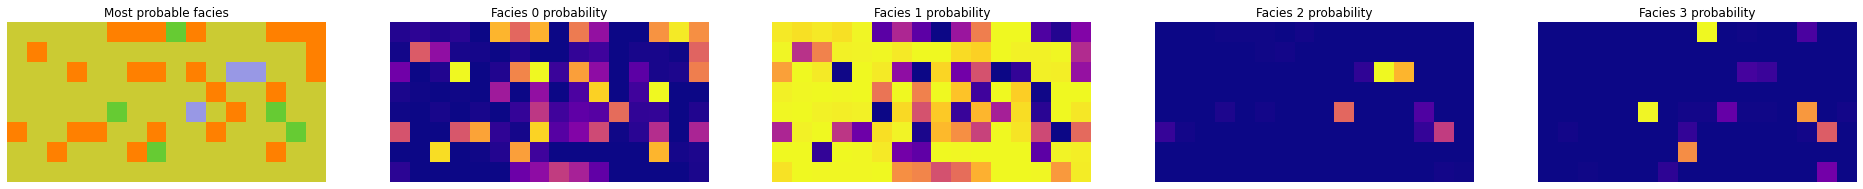

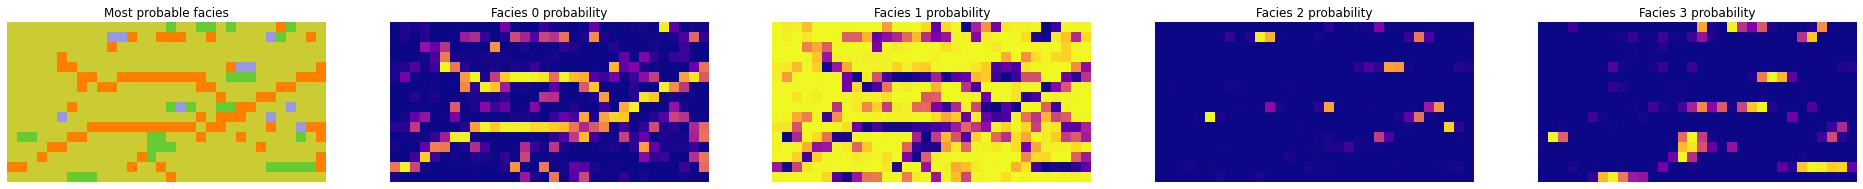

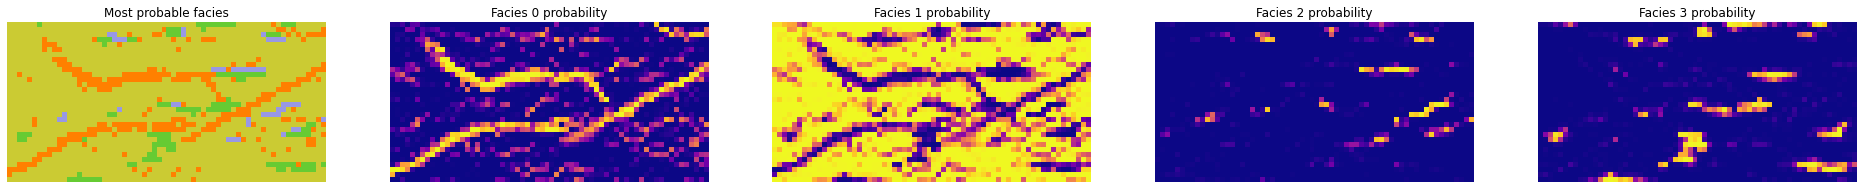

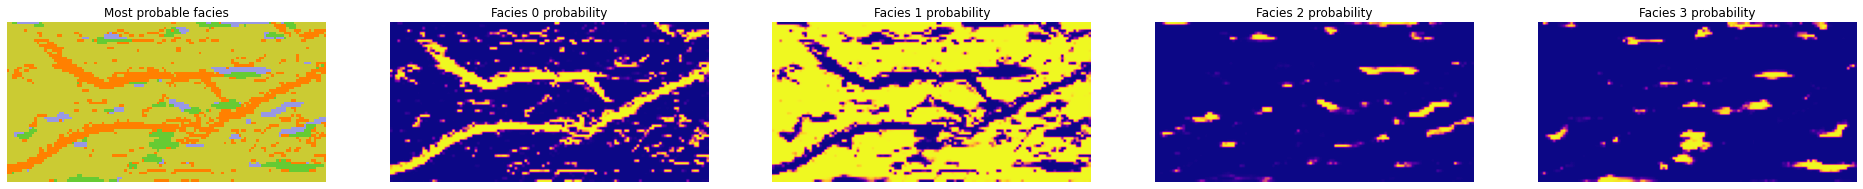

In [ ]:
random_latent_vectors = generate_noise(1, *noise_shape, 1)
generated_images = g_model(random_latent_vectors, training=True)
show_multi_scale_images_and_probas(generated_images, cmap=cmap, norm=norm)

In [ ]:

print("Res 1")
random_latent_vectors = generate_noise(1, 24, 32, 1)
generated_images = g_model(random_latent_vectors, training=True)
show_multi_scale_images_and_probas(generated_images, cmap=cmap, norm=norm)

print("Res 2")
random_latent_vectors = generate_noise(1, 16, 32, 1)
generated_images = g_model(random_latent_vectors, training=True)
show_multi_scale_images_and_probas(generated_images, cmap=cmap, norm=norm)

print("Res 3")
random_latent_vectors = generate_noise(1, 64, 64, 1)
generated_images = g_model(random_latent_vectors, training=True)
show_multi_scale_images_and_probas(generated_images, cmap=cmap, norm=norm)

print("Res 4")
random_latent_vectors = generate_noise(1, 8, 50, 1)
generated_images = g_model(random_latent_vectors, training=True)
show_multi_scale_images_and_probas(generated_images, cmap=cmap, norm=norm)

In [ ]:
import os

SAVE_AND_TAR_RESULTS_WEIGHTS = True

if SAVE_AND_TAR_RESULTS_WEIGHTS:
  msgan_checkpoint_path = "msgan_weights_horizontal_good/cp-msgan2d_horizontal_good.ckpt"
  msgan_checkpoint_dir = os.path.dirname(msgan_checkpoint_path)

  msgan.save_weights(msgan_checkpoint_path)

  !tar -czvf msgan_weights_horizontal_good.tar.gz ./msgan_weights_horizontal_good

  gen_checkpoint_path = "gen_weights_horizontal_good/cp-gen2d_horizontal_good.ckpt"
  gen_checkpoint_dir = os.path.dirname(gen_checkpoint_path)

  msgan.generator.save_weights(gen_checkpoint_path)

  !tar -czvf gen_weights_horizontal_good.tar.gz ./gen_weights_horizontal_good

./msgan_weights_horizontal_good/
./msgan_weights_horizontal_good/checkpoint
./msgan_weights_horizontal_good/cp-msgan2d_horizontal_good.ckpt.data-00000-of-00001
./msgan_weights_horizontal_good/cp-msgan2d_horizontal_good.ckpt.index
./gen_weights_horizontal_good/
./gen_weights_horizontal_good/checkpoint
./gen_weights_horizontal_good/cp-gen2d_horizontal_good.ckpt.data-00000-of-00001
./gen_weights_horizontal_good/cp-gen2d_horizontal_good.ckpt.index


# Version without Gaussian Noise


In [9]:
# Creating the Generator Model
g_model = MultiScaleGenerator(output_dims=slice_size)
g_model.build([None, *noise_shape, 1])
generator_optimizer = keras.optimizers.Adam(learning_rate=5e-4, beta_1=0.5, beta_2=0.99)
g_model.summary()

Model: "multi_scale_generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 generator_initial (Generato  multiple                 40        
 rInitial)                                                       
                                                                 
 generator_block (GeneratorB  multiple                 39556     
 lock)                                                           
                                                                 
 generator_block_1 (Generato  multiple                 27844     
 rBlock)                                                         
                                                                 
 generator_block_2 (Generato  multiple                 7012      
 rBlock)                                                         
                                                                 
 last_generator_block (LastG  multiple       

In [10]:
# Creating the Discriminator Model
multiscale = (64, 128, 4)

d_model = get_discriminator_model(multiscale, add_noise=False)
discriminator_optimizer = keras.optimizers.Adam(learning_rate=5e-4, beta_1=0.5, beta_2=0.99)
d_model.summary()

Model: "discriminator"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 64, 128, 4)  0           []                               
                                ]                                                                 
                                                                                                  
 initial_discriminator_block (I  (None, 32, 64, 16)  5376        ['input_1[0][0]']                
 nitialDiscriminatorBlock)                                                                        
                                                                                                  
 input_2 (InputLayer)           [(None, 32, 64, 4)]  0           []                               
                                                                                      

In [11]:
# Creating the model
msgan = MSGAN(
    discriminator=d_model,
    generator=g_model,
    latent_shape=(*noise_shape, 1),
    discriminator_extra_steps=2,
    generator_extra_steps=2
)

In [13]:
# Training the model
epochs = 100

msgan.compile(d_optimizer=discriminator_optimizer, g_optimizer=generator_optimizer)

history = msgan.fit(dataloader, batch_size=batch_size, epochs=epochs, callbacks=[])

Epoch 1/100
150/150 [==============================] - 67s 447ms/step - d_loss: 0.7286 - g_loss: 5.1784
Epoch 2/100
150/150 [==============================] - 67s 449ms/step - d_loss: 1.4926 - g_loss: 3.4346
Epoch 3/100
150/150 [==============================] - 67s 448ms/step - d_loss: 1.1888 - g_loss: 1.3767
Epoch 4/100
150/150 [==============================] - 68s 451ms/step - d_loss: 1.3735 - g_loss: 2.8337
Epoch 5/100
150/150 [==============================] - 68s 450ms/step - d_loss: 1.0044 - g_loss: 3.1695
Epoch 6/100
150/150 [==============================] - 67s 448ms/step - d_loss: 0.6558 - g_loss: 3.7838
Epoch 7/100
150/150 [==============================] - 67s 448ms/step - d_loss: 1.1193 - g_loss: 3.1777
Epoch 8/100
150/150 [==============================] - 67s 444ms/step - d_loss: 0.7393 - g_loss: 5.0639
Epoch 9/100
150/150 [==============================] - 67s 449ms/step - d_loss: 0.8567 - g_loss: 3.5277
Epoch 10/100
150/150 [==============================] - 67s 446m

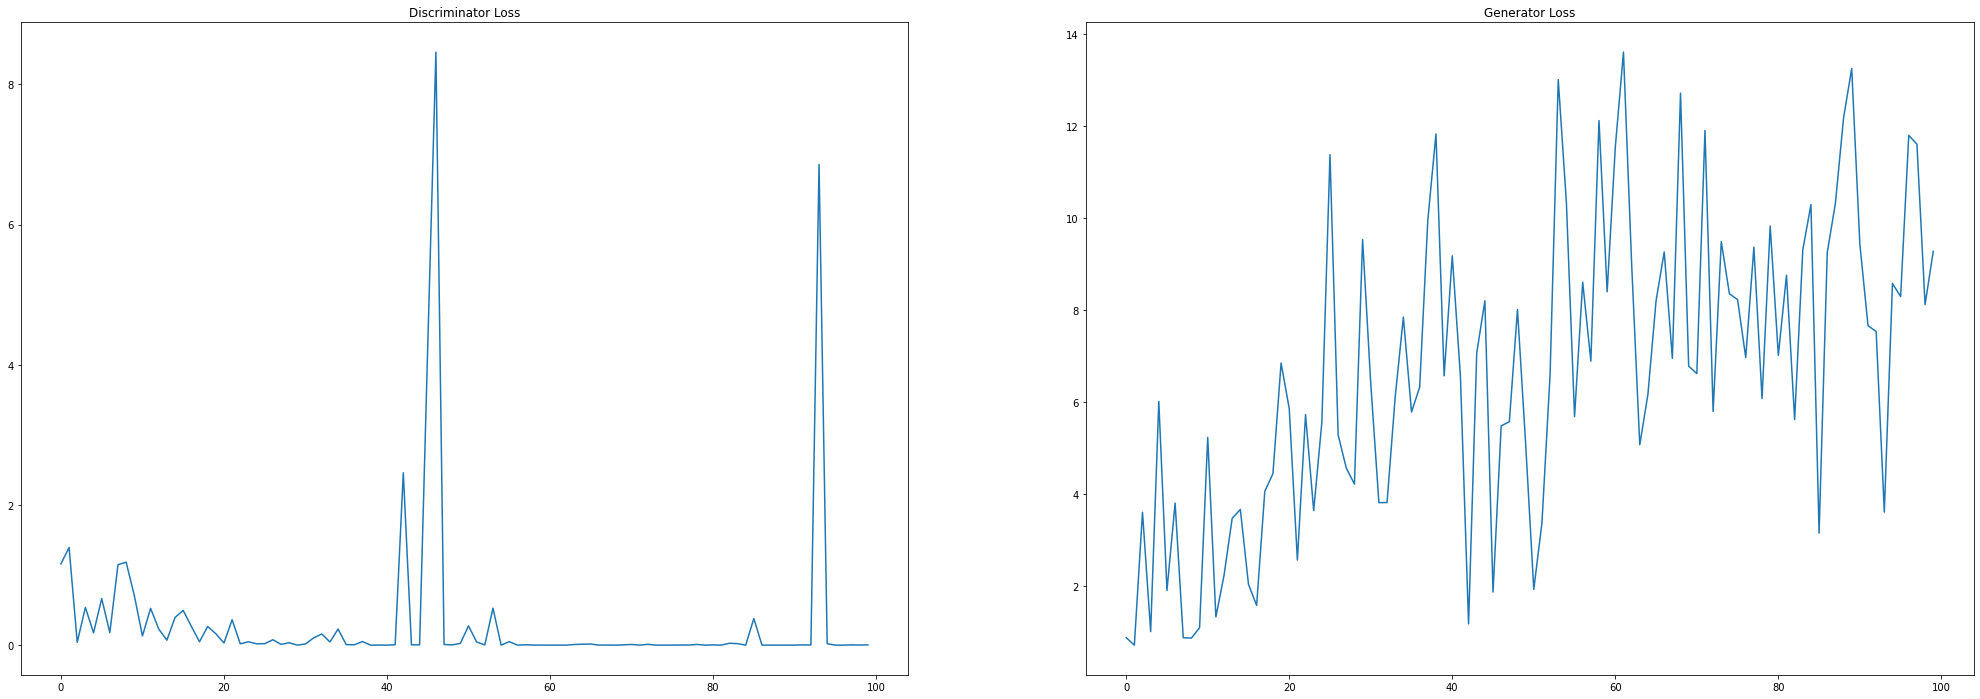

In [14]:
# Error plotting
x_axis = np.arange(epochs)
plt.figure(figsize=(35, 12))
plt.subplot(1, 2, 1)
plt.title("Discriminator Loss")
plt.plot(x_axis, history.history["d_loss"])
plt.subplot(1, 2, 2)
plt.title("Generator Loss")
plt.plot(x_axis, history.history["g_loss"])
plt.show()

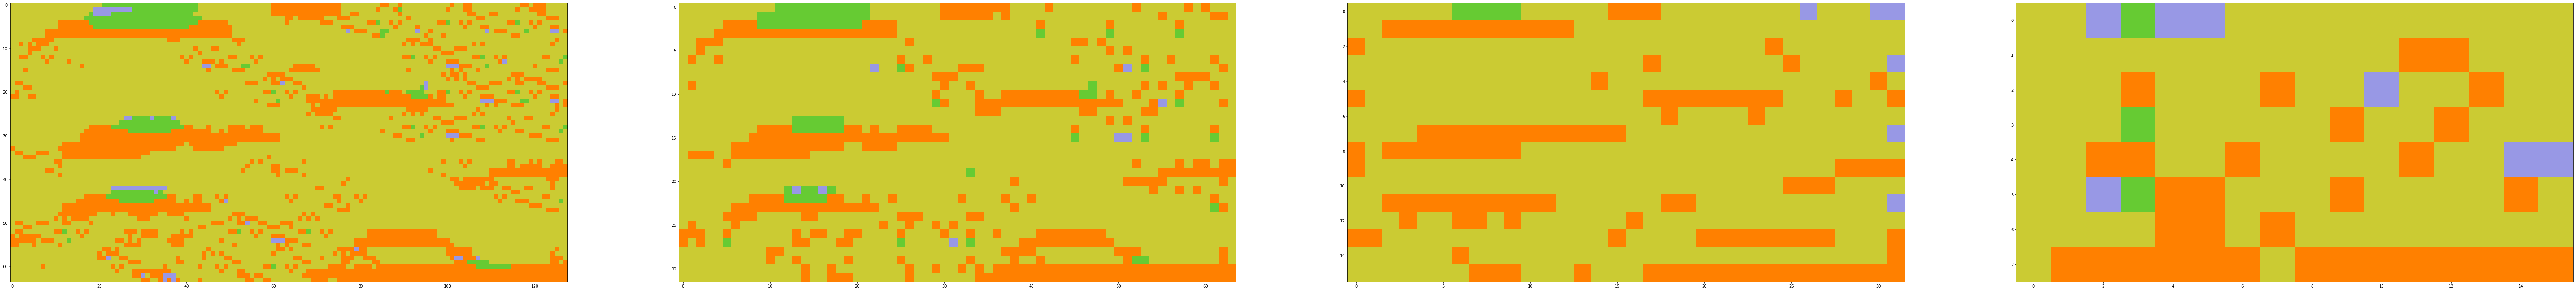

<class 'numpy.ndarray'>


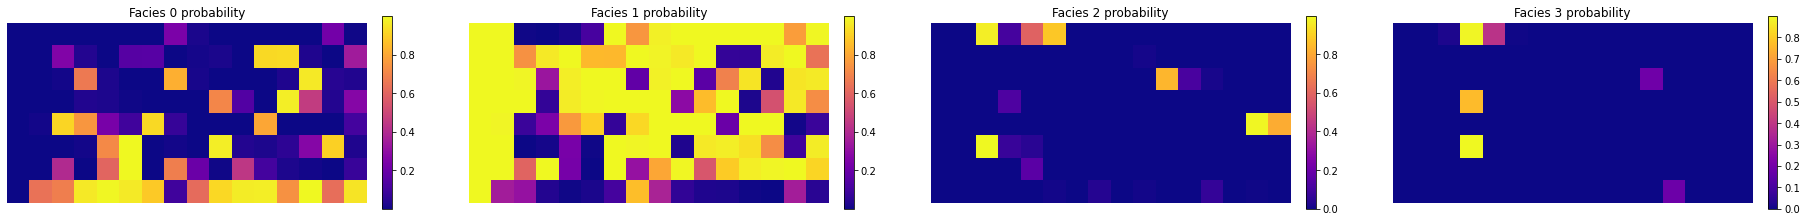

<class 'numpy.ndarray'>


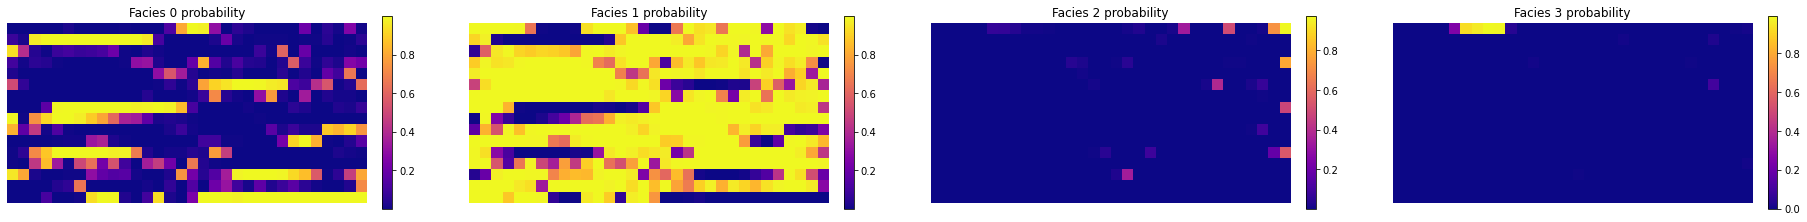

<class 'numpy.ndarray'>


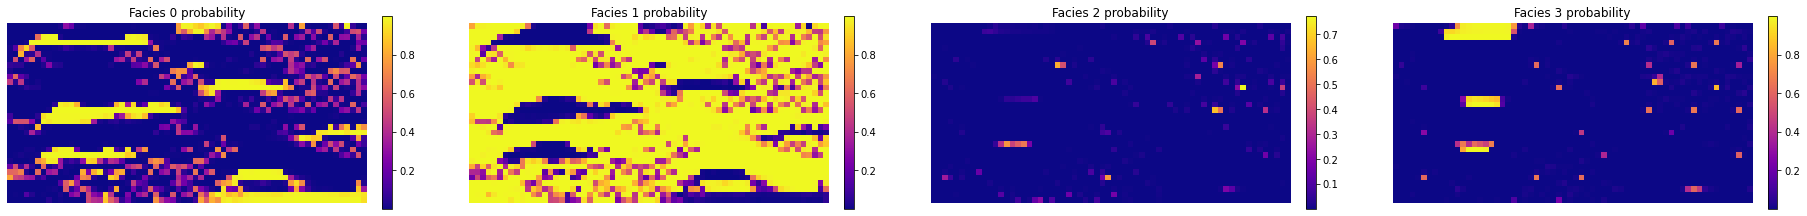

<class 'numpy.ndarray'>


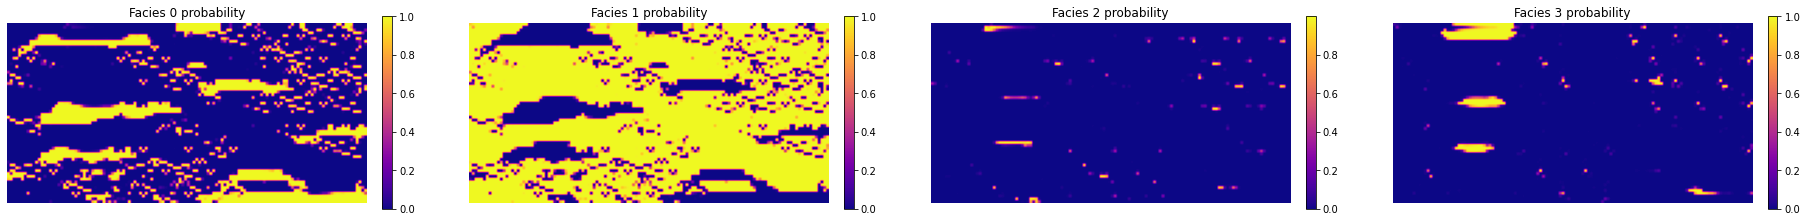

In [15]:
random_latent_vectors = generate_noise(1, *noise_shape, 1)
generated_images = g_model(random_latent_vectors, training=True)
show_multi_scale_images_and_probas(generated_images, cmap=cmap, norm=norm)